## init

In [1]:
from pyfiles import examples as ex, input as inp, plot as ourplot
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

## closest point voronoi

[[], [11, 7, 6, -1, 9], [4, -1, 3], [10, 1, 3, -1, 9], [2, -1, 12], [13, -1, 14], [13, -1, 2], [14, -1, 4], [17, 6, -1, 5, 16], [26, 22, 23, -1, 25], [29, -1, 28], [12, -1, 29], [29, -1, 28], [14, -1, 13], [4, -1, 3], [20, 18, -1, 8, 19], [14, -1, 4], [-1, 12, 2], [13, -1, 2], [24, 0, 28, -1, 23], [29, -1, 12], [31, 15, -1, 5, 30], [34, -1, 8, 21, 33], [35, 1, 3, -1, 34], [39, -1, 36, 37, 38], [40, 27, 25, -1, 39], [43, 0, 28, -1, 42], [45, 41, 42, -1, 44], [48, -1, 47], [48, -1, 32], [47, -1, 20, 18], [48, 32, -1, 18, 47], [35, -1, 33, 34], [31, -1, 30], [33, -1, 21], [20, -1, 19], [17, -1, 16], [31, -1, 15], [11, 9, 10, -1], [17, -1, 7, 6], [35, -1, 10, 1], [30, 5, 16, -1], [21, -1, 19, 8], [32, -1], [11, 7, -1], [15, -1], [53, -1, 51, 52], [51, -1, 50], [53, -1, 46], [52, -1, 49, 50, 51], [53, 46, 44, -1, 52], [50, 49, -1], [46, 44, 45, -1], [43, -1, 41, 42], [40, -1, 38, 39], [37, 36, -1], [45, -1, 41], [27, 25, 26, -1], [24, -1, 22, 23], [38, -1, 37], [26, -1, 22], [40, 27, -1], [

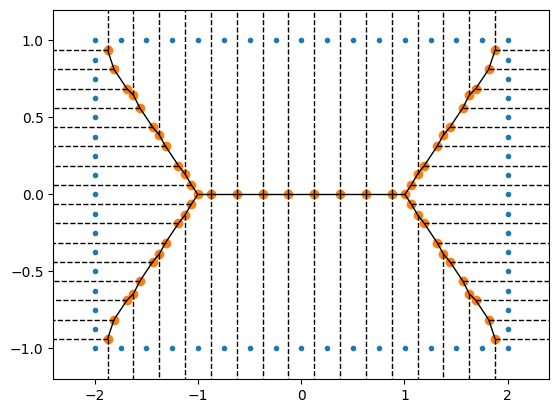

In [9]:
example = ex.two_d_rect
complex = inp.read_obj(example.filename)
coords = np.array([s.coords for s in complex.vertlist])

# just the 2d coords for now
smallcoords = coords[:, 0:2]

vor = Voronoi(smallcoords, furthest_site=False)
print(vor.regions)
fig = voronoi_plot_2d(vor)
plt.show()

## furthest point voronoi

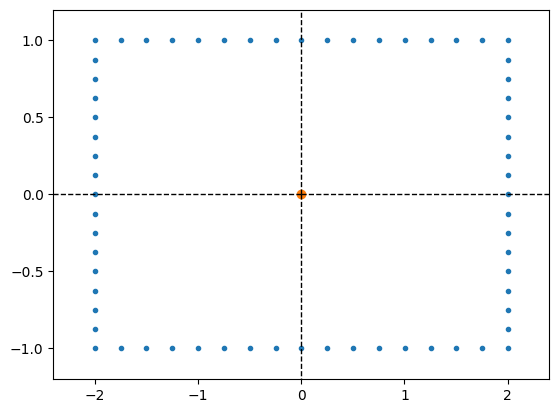

In [28]:
vor = Voronoi(smallcoords, furthest_site=True)
fig = voronoi_plot_2d(vor)
plt.show()

## 3D voronoi

80


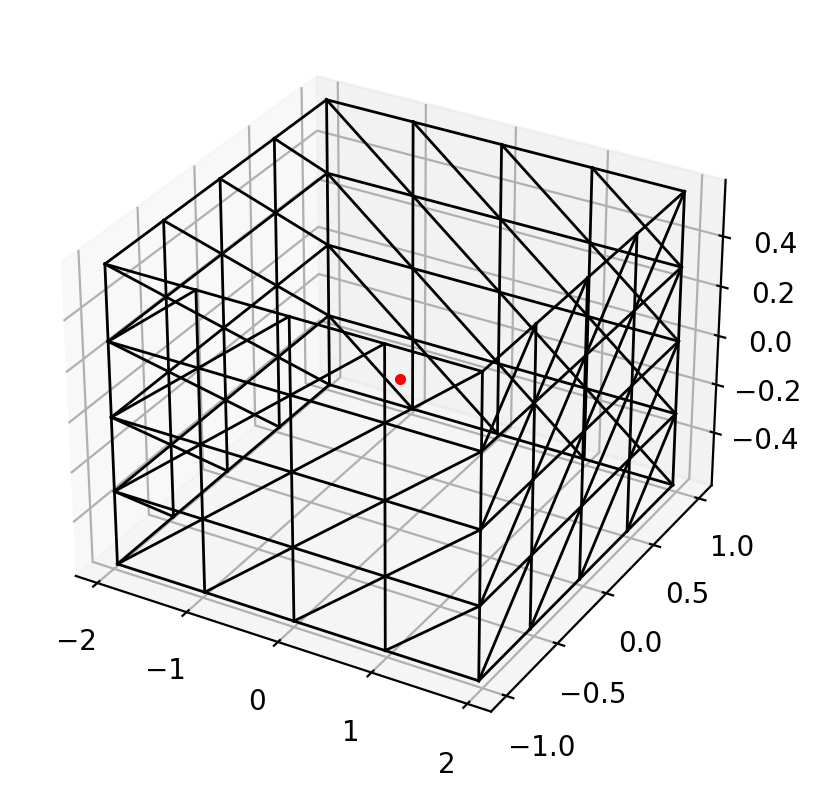

In [31]:
example = ex.anothercyl
example = ex.rect_test2
# example = ex.two_d_rect_atangle
complex = inp.read_obj(example.filename)
print(len(complex.vertlist))

coords = np.array([s.coords for s in complex.vertlist])

vor = Voronoi(coords, furthest_site=True)

fig, ax = plt.subplots(subplot_kw={"projection": "3d", "computed_zorder": False})
fig.set_dpi(200)

for edge in complex.edgelist:
    p = complex.vertlist[edge.boundary[0]].coords
    q = complex.vertlist[edge.boundary[1]].coords
    ax.plot([p[0], q[0]], [p[1], q[1]], [p[2], q[2]], color="black", linewidth=1)

for row in vor.vertices:
    ax.plot(row[0], row[1], row[2], "o", color="red", markersize=3)


def write_vor_to_obj(vor, filename):
    with open(filename, "w") as f:
        vertices = vor.vertices
        for vert in vertices:
            f.write(f"v {vert[0]} {vert[1]} {vert[2]}\n")
        rvs = [l for l in vor.ridge_vertices if not -1 in l]
        for indices in rvs:
            f.write("f ")
            for i in indices:
                f.write(f'{i + 1} ')
            f.write("\n")


from mpl_toolkits.mplot3d.art3d import Poly3DCollection

regions = vor.regions
for reg in regions:
    if reg == []:
        continue
    asd = vor.vertices[reg if reg[0] != -1 else reg[1:]]
    xs = asd[:, 0]
    ys = asd[:, 1]
    zs = asd[:, 2]
    verts = [list(zip(xs, ys, zs))]
    ax.add_collection3d(Poly3DCollection(verts, alpha=0.2))  # type: ignore

In [26]:
# regions
print(vor.ridge_vertices)
# vor.vertices

write_vor_to_obj(vor, 'output/cyl.obj')

[[-1, 6, 13], [-1, 13, 6], [1, -1, 35], [35, 1, 11, 37], [1, -1, 11], [37, 35, -1], [37, 11, -1], [-1, 8, 9], [-1, 9, 8], [3, 22, -1], [-1, 22, 3], [26, 29, -1], [-1, 32, 29, 26], [-1, 32, 29], [23, 20, -1], [23, 20, -1], [-1, 32, 33, 7], [-1, 7, 33], [-1, 32, 33], [-1, 55, 56], [58, -1, 55], [56, -1, 57], [-1, 57, 58], [55, 58, 57, 56], [55, 56, -1], [27, 65, -1], [-1, 27, 65], [49, 50, 51], [-1, 50, 51], [-1, 51, 49], [-1, 49, 50], [-1, 46, 50, 51], [-1, 46, 50], [-1, 69, 71], [-1, 71, 69], [-1, 70, 14], [70, 14, -1, 71], [-1, 71, 70], [-1, 33, 28], [28, 7, -1], [33, 7, 28], [-1, 72, 69], [36, -1, 72, 66], [-1, 14, 36], [72, 69, 71, 70, 68, 66], [36, 14, 70, 68], [36, 68, 66], [-1, 60, 59], [-1, 62, 61], [-1, 59, 61], [-1, 62, 58, 55], [58, 62, 61, 59, 60, 57], [60, -1, 56, 57], [-1, 24, 54], [-1, 9, 10, 24], [8, -1, 54, 24, 10], [10, 9, 8], [-1, 3, 2], [-1, 2, 21, 62], [22, 3, 2, 21], [62, 21, 22, -1, 61], [-1, 7, 28, 30], [-1, 28, 30, 31, 67], [-1, 31, 30], [31, -1, 72, 67], [72, 6